<h3>English Premier League Transfers EDA</h3>


Introduction

<h6>
In this project, I explore a dataset containing player transfers of the English Premier League from 1992 to 2022.
I aim to uncover hidden patterns, get insights into the transfer market in english football, and how ot has eveolved over time

The dataset was pulled from github at https://github.com/ewenme/transfers, it can also be found on Kaggle.


The dataset contains the following fields:
club name; 
player name;
age; 
position; 
club_involved_name; 
fee; transfer fee
transfer movement; 
transfer period;
fee_cleaned; 
league_name; 
year; 
season;
</h6>

Importing required libraries

In [184]:
import glob
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Reading csv files

In [185]:
#getting path and csv files
path = "C:\\Users\\Fareed\\Downloads\\Main Footy Project"

#convert csv file to dataframe
transfer = pd.read_csv('premier-league.csv')

Data Inspection

In [186]:
transfer.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,Middlesbrough FC,Tommy Wright,26.0,Left Winger,Leicester,€910Th.,in,Summer,0.91,Premier League,1992,1992/1993
1,Middlesbrough FC,Jonathan Gittens,28.0,defence,Southampton,€250Th.,in,Summer,0.25,Premier League,1992,1992/1993
2,Middlesbrough FC,Chris Morris,28.0,Right-Back,Celtic,?,in,Summer,NaN,Premier League,1992,1992/1993
3,Middlesbrough FC,Ben Roberts,17.0,Goalkeeper,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993
4,Middlesbrough FC,Andy Todd,17.0,Centre-Back,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993


In [187]:
transfer.shape

(23498, 12)

In [188]:
transfer.describe()

,age,fee_cleaned,year
count,23483.000000,8972.000000,23498.000000
mean,24.168335,4.320695,2008.018640
std,4.818588,9.470622,8.096778
min,15.000000,0.000000,1992.000000
25%,20.000000,0.000000,2002.000000
50%,23.000000,0.750000,2008.000000
75%,27.000000,4.200000,2015.000000
max,47.000000,135.000000,2022.000000


In [189]:
transfer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23498 entries, 0 to 23497
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           23498 non-null  object 
 1   player_name         23498 non-null  object 
 2   age                 23483 non-null  float64
 3   position            23498 non-null  object 
 4   club_involved_name  23498 non-null  object 
 5   fee                 23494 non-null  object 
 6   transfer_movement   23498 non-null  object 
 7   transfer_period     23498 non-null  object 
 8   fee_cleaned         8972 non-null   float64
 9   league_name         23498 non-null  object 
 10  year                23498 non-null  int64  
 11  season              23498 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.2+ MB


<h4>Data Cleaning </h4>

<h6>
Possible Issues:
- Duplicates
- Null issues - fee column -  4 nulls, 
                age col - 15 nulls, 
                fee_cleaned column has too many nulls 14,526 nulls
- Three transfer_periods(summer, Summer, winter) 
</h6>


In [190]:
#checking for duplicates
transfer.duplicated(keep = False).sum()

26

In [191]:
transfer.loc[transfer.duplicated(keep = False), :]

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
1221,Coventry City,Paul Williams,25.0,defence,Huddersfield,loan transfer,out,Winter,NaN,Premier League,1994,1994/1995
1222,Coventry City,Paul Williams,25.0,defence,Huddersfield,loan transfer,out,Winter,NaN,Premier League,1994,1994/1995
1391,Nottingham Forest,Gary Bull,29.0,attack,Brighton,loan transfer,out,Summer,NaN,Premier League,1995,1995/1996
1392,Nottingham Forest,Gary Bull,29.0,attack,Brighton,loan transfer,out,Summer,NaN,Premier League,1995,1995/1996
2863,Crystal Palace,Danny Boxall,20.0,defence,Oldham Athletic,loan transfer,out,Winter,NaN,Premier League,1997,1997/1998
2865,Crystal Palace,Danny Boxall,20.0,defence,Oldham Athletic,loan transfer,out,Winter,NaN,Premier League,1997,1997/1998
2935,Bolton Wanderers,Bryan Small,26.0,defence,Bury,loan transfer,out,Winter,NaN,Premier League,1997,1997/1998
2937,Bolton Wanderers,Bryan Small,26.0,defence,Bury,loan transfer,out,Winter,NaN,Premier League,1997,1997/1998
4284,Southampton FC,Richard Dryden,30.0,Centre-Back,Stoke City,?,out,Winter,NaN,Premier League,1999,1999/2000
4285,Southampton FC,Richard Dryden,30.0,Centre-Back,Stoke City,?,out,Winter,NaN,Premier League,1999,1999/2000


In [192]:
#removing duplicates
transfer.drop_duplicates(inplace = True, keep = 'first')

In [193]:
#confirming duplicates are removed
transfer.duplicated(keep = False).sum()

0

In [194]:
#sorting null issues
transfer.isnull().sum()

club_name                 0
player_name               0
age                      15
position                  0
club_involved_name        0
fee                       4
transfer_movement         0
transfer_period           0
fee_cleaned           14513
league_name               0
year                      0
season                    0
dtype: int64

<h6>Ignoring the nulls in columns age and fee as they won't have a serious effect on analysis.
Analysis in the fee_cleaned column will be limited/abandoned as it has too many nulls and cannot be dropped. </h6>

In [195]:
#transfer window column having three values instead of the standard two
transfer['transfer_period'].unique()


array(['Summer', 'Winter', 'summer'], dtype=object)

In [196]:
transfer['transfer_period'].replace('summer', 'Summer' , inplace = True)

In [197]:
transfer['transfer_period'].unique()

array(['Summer', 'Winter'], dtype=object)

In [198]:
#checking that club names have no numeric data
transfer.club_name.str.isnumeric().sum()

0

<h6>Some player positions are not specific - it doesn't state what part of the defence, attack or midfield it is.
In analysis, instead of analysing by distinct positions, analysis would be carried out by the four major postions - goalkeeping, defence, midfield and attack. </h6>

In [199]:
#highlighting all distinct positions, some positions are vague and not specific - 'defence', 'attack', 'midfield'
transfer.position.unique()

array(['Left Winger', 'defence', 'Right-Back', 'Goalkeeper',
       'Centre-Back', 'Right Winger', 'Centre-Forward', 'attack',
       'Defensive Midfield', 'Left Midfield', 'Attacking Midfield',
       'Central Midfield', 'midfield', 'Right Midfield', 'Left-Back',
       'Second Striker'], dtype=object)

In [200]:
#creating age group column from age column
#finding maximum age first, so as to know range of bins and cover all ages.
transfer.age.max()

47.0

In [201]:
#creating age group from 0-50 in group of 5s
agegroup_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
agegroup_labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50']
transfer['age_group'] = pd.cut(x = transfer['age'], bins = agegroup_bins, labels = agegroup_labels)

In [202]:
transfer.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,age_group
0,Middlesbrough FC,Tommy Wright,26.0,Left Winger,Leicester,€910Th.,in,Summer,0.91,Premier League,1992,1992/1993,26-30
1,Middlesbrough FC,Jonathan Gittens,28.0,defence,Southampton,€250Th.,in,Summer,0.25,Premier League,1992,1992/1993,26-30
2,Middlesbrough FC,Chris Morris,28.0,Right-Back,Celtic,?,in,Summer,NaN,Premier League,1992,1992/1993,26-30
3,Middlesbrough FC,Ben Roberts,17.0,Goalkeeper,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993,16-20
4,Middlesbrough FC,Andy Todd,17.0,Centre-Back,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993,16-20


<h4>Exploratory Data Analysis (EDA)</h4>

Clubs most involved in the transfer market

In [203]:
#Busiest clubs in the transfer window -- number of transfers involved in
transfer['club_name'].value_counts(ascending= False).nlargest(10)

Chelsea FC           1307
Tottenham Hotspur    1218
Manchester City      1093
West Ham United      1087
Liverpool FC         1068
Manchester United    1011
Newcastle United      977
Arsenal FC            963
Aston Villa           960
Everton FC            957
Name: club_name, dtype: int64

Clubs with the most buys

In [204]:
#Clubs with the most buys in the transfer window
transfer[['club_name', 'transfer_movement']][transfer["transfer_movement"] == "in"].groupby('club_name').value_counts(ascending= False).nlargest(10)

club_name          transfer_movement
Chelsea FC         in                   655
Tottenham Hotspur  in                   602
Manchester City    in                   546
West Ham United    in                   545
Liverpool FC       in                   533
Manchester United  in                   507
Newcastle United   in                   494
Aston Villa        in                   479
Everton FC         in                   479
Arsenal FC         in                   478
dtype: int64

Clubs with the least buys

In [205]:
#Clubs with the least buys in the transfer window
transfer[['club_name', 'transfer_movement']][transfer["transfer_movement"] == "in"].groupby('club_name').value_counts(ascending= False).nsmallest(5)

club_name        transfer_movement
Swindon Town     in                    8
Barnsley FC      in                   13
Oldham Athletic  in                   19
Blackpool FC     in                   27
Brentford FC     in                   30
dtype: int64

Clubs with the most sales

In [206]:
#Clubs with the most sales in the transfer window
transfer[['club_name', 'transfer_movement']][transfer["transfer_movement"] == "out"].groupby('club_name').value_counts(ascending= False).nlargest(10)

club_name          transfer_movement
Chelsea FC         out                  652
Tottenham Hotspur  out                  616
Manchester City    out                  547
West Ham United    out                  542
Liverpool FC       out                  535
Manchester United  out                  504
Arsenal FC         out                  485
Newcastle United   out                  483
Aston Villa        out                  481
Everton FC         out                  478
dtype: int64

Clubs with the least sales

In [207]:
#Clubs with the least sales in the transfer window
transfer[['club_name', 'transfer_movement']][transfer["transfer_movement"] == "out"].groupby('club_name').value_counts(ascending= False).nsmallest(5)

club_name        transfer_movement
Swindon Town     out                   8
Barnsley FC      out                   9
Oldham Athletic  out                  12
Blackpool FC     out                  23
Brentford FC     out                  28
dtype: int64

Busiest transfer seasons

In [208]:
#seasons with the most transfers
transfer['season'].value_counts().nlargest(5)

2014/2015    1032
2011/2012    1017
2013/2014     988
2012/2013     954
2003/2004     954
Name: season, dtype: int64

In [209]:
#seasons with the least transfers
transfer['season'].value_counts().nsmallest(5)

1992/1993    404
1993/1994    445
1994/1995    491
1995/1996    520
2022/2023    523
Name: season, dtype: int64

Transfers over time

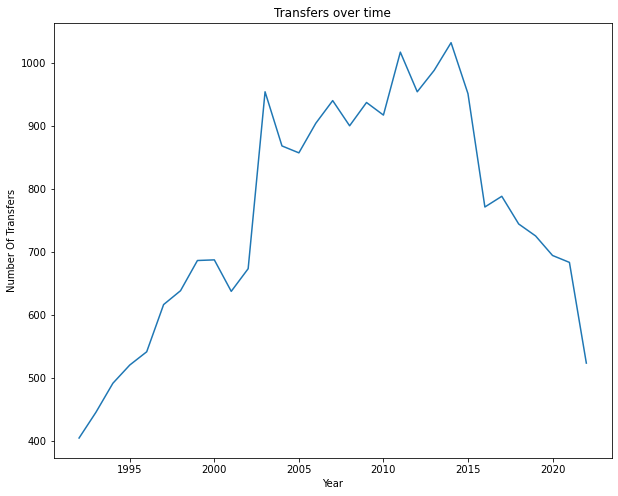

In [210]:
# Plotting transfers over time 
tot = transfer.groupby('year').size()
tot.plot(kind = 'line', figsize= (10,8) )
plt.title('Transfers over time')
plt.xlabel('Year')
plt.ylabel('Number Of transfers')
plt.show()

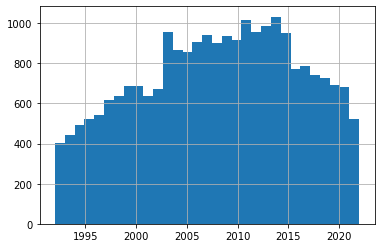

In [211]:
transfer['year'].hist(bins = 31)
plt.show()

Transfers by age group

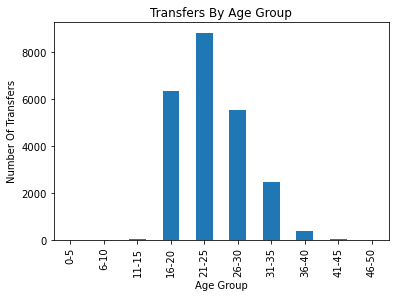

In [212]:
#Transfers by age group
transfer_by_age_group = transfer.groupby('age_group').size()
transfer_by_age_group.plot(kind = 'bar')
plt.title('Transfers By age group')
plt.xlabel('Age group')
plt.ylabel('Number of transfers')
plt.show()

In [213]:
#Number Of PL clubs involved
transfer.club_name.nunique()

50

Transfers by Position

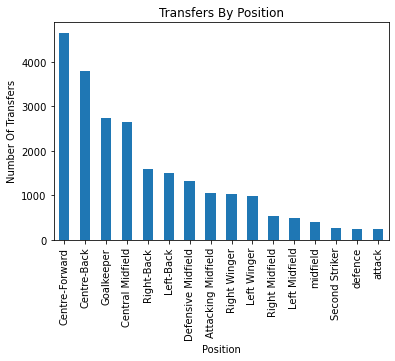

In [214]:
#Transfers by position
transfers_by_position = transfer.groupby('position').size().sort_values(ascending=False)
transfers_by_position.plot(kind = 'bar', title = 'Transfers by position')
plt.xlabel('Position')
plt.ylabel('Number of transfers')
plt.show()

In [215]:
#Classifying Transfers by a more specific metric, limiting to just 4 positions - Defence, Forward, Goalkeeping and Midfield positions

def broad_p(x):
    Forward_positions = re.compile("Centre-Forward|Right Winger|Left Winger|Second Striker|attack")
    Defensive_positions = re.compile("Centre-Back|Right-Back|Left-Back|defence")
    Midfield_positions = re.compile("Central Midfield|Defensive Midfield|Attacking Midfield|Right Midfield|Left Midfield|midfield")
    if Forward_positions.match(x):
        return 'Forwards'
    elif Defensive_positions.match(x):
        return 'Defenders'
    elif Midfield_positions.match(x):
        return 'Midfielders'
    else:
        return 'Goalkeepers'

transfer['player_position'] = transfer['position'].apply(broad_p)

In [216]:
transfer.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,age_group,player_position
0,Middlesbrough FC,Tommy Wright,26.0,Left Winger,Leicester,€910Th.,in,Summer,0.91,Premier League,1992,1992/1993,26-30,Forwards
1,Middlesbrough FC,Jonathan Gittens,28.0,defence,Southampton,€250Th.,in,Summer,0.25,Premier League,1992,1992/1993,26-30,Defenders
2,Middlesbrough FC,Chris Morris,28.0,Right-Back,Celtic,?,in,Summer,NaN,Premier League,1992,1992/1993,26-30,Defenders
3,Middlesbrough FC,Ben Roberts,17.0,Goalkeeper,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993,16-20,Goalkeepers
4,Middlesbrough FC,Andy Todd,17.0,Centre-Back,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993,16-20,Defenders


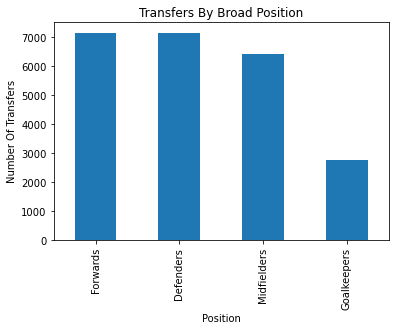

In [217]:
#Transfers by Position II
transfers_by_broad_position = transfer.groupby('player_position').size().sort_values(ascending=False)
transfers_by_broad_position.plot(kind = 'bar', title = 'Transfers By broad position')
plt.xlabel('Position')
plt.ylabel('Number Of transfers')
plt.show()

Findings and Insights

<h6>

1. Of the clubs most involved in the most transfers in terms of quantity of buys and sales, only West Ham aren't part of the traditional PL's 'Big Six'. They rank fourth in terms of transfer involvements. They also bought and sold more players than Liverpool, Man Utd and Arsenal.

2. Arsenal's somewhat unpopular prudence in terms of spending is proven here as they rank tenth in terms of transfers in, with clubs like Aston Villa, Everton, Newcastle and West Ham buying more players than them over the last 20 years. 

3. The 2014/2015 season recorded the most transfers with over 1000 transfers, with only the 2011/2012 being the only season with over 1000 transfers. Generally, the early 2010s were the seasons with the most transfers with 4 seasons making the top 5. The fifth busiest season was the 2003/2004 season. The early 90s has the least transfers.

4. Unsurprisingly, the age group of most of players transferred was 21-25 as this is when players are usually 'hot' and deemed talented. Players aged 16-20 were also transferred more than players aged 26-30.

5. Forwards and defenders are the kind of players most sought after.
 
</h6>

Limitations 

<h6> The fee column having way too many nulls affected analysis greatly as i could not analyze clubs that spent or sold more in terms of transfer fees.
</h6>